In [1]:
from pathlib import Path

from bcmi import BCMICalibrationLoader, BCMITrainingLoader
from data import EEGMusicDataset
from data import copy_from_dataloader_into_dir
import tempfile
import matplotlib.pyplot as plt
from data import MappedDataset, MelParams, prepare_trial, rereference_trial
from fractions import Fraction
from data import StratifiedSamplingDataset

# # %load_ext autoreload
# %autoreload 2

/home/zmrocze/studia/uwr/magisterka/.devenv/state/venv/lib/python3.12/site-packages/speechbrain/utils/torch_audio_backend.py:57: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  available_backends = torchaudio.list_audio_backends()


In [2]:
def create_combined_training_calibration_dataset(
  bcmi_root_path: str, new_dataset_save_dir: Path
) -> EEGMusicDataset:
  """Create an EEGMusicDataset that combines BCMI training and calibration data."""

  training_loader = BCMITrainingLoader(f"{bcmi_root_path}/bcmi-training", dataset_name="bcmi-training")
  training_loader.load_all_subjects()
  copy_from_dataloader_into_dir(training_loader, new_dataset_save_dir)
  del training_loader
  calibration_loader = BCMICalibrationLoader(f"{bcmi_root_path}/bcmi-calibration", dataset_name="bcmi-calibration")
  calibration_loader.load_all_subjects()
  copy_from_dataloader_into_dir(calibration_loader, new_dataset_save_dir)
  del calibration_loader

  combined_dataset = EEGMusicDataset.load_ondisk(new_dataset_save_dir)

  return combined_dataset

In [3]:
# Created with tempfile; persists until you delete it (or OS temp cleanup).
temp_save_dir = Path(tempfile.mkdtemp(prefix="bcmi_combined_dataset_"))
combined_dataset = create_combined_training_calibration_dataset("./datasets/bcmi", temp_save_dir)

Loading subject 08 (bcmi-training):


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 1 ses-3: 1008.0s, 36 events, 36 trials
  ✓ Run 2 ses-3: 1005.0s, 36 events, 36 trials
  ✓ Run 3 ses-3: 1010.0s, 36 events, 36 trials
  ✓ Run 4 ses-3: 1011.0s, 36 events, 36 trials
Loading subject 09 (bcmi-training):
  ✓ Run 1 ses-3: 1038.0s, 36 events, 36 trials
  ✓ Run 2 ses-3: 1052.0s, 36 events, 36 trials
  ✓ Run 3 ses-3: 1034.0s, 36 events, 36 trials
  ✓ Run 4 ses-3: 1036.0s, 36 events, 36 trials
  ✓ Run 1 ses-1: 1045.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1033.0s, 36 events, 36 trials
  ✓ Run 3 ses-1: 1034.0s, 36 events, 36 trials
  ✓ Run 4 ses-1: 1031.0s, 36 events, 36 trials
  ✓ Run 1 ses-2: 1036.0s, 36 events, 36 trials
  ✓ Run 2 ses-2: 1032.0s, 36 events, 36 trials
  ✓ Run 3 ses-2: 1016.0s, 36 events, 36 trials


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set t

  ✓ Run 4 ses-2: 1026.0s, 36 events, 36 trials
Loading subject 10 (bcmi-training):
  ✓ Run 1 ses-3: 1095.0s, 36 events, 36 trials
  ✓ Run 2 ses-3: 1115.0s, 36 events, 36 trials
  ✓ Run 3 ses-3: 1151.0s, 36 events, 36 trials
  ✓ Run 4 ses-3: 1068.0s, 36 events, 36 trials
  ✓ Run 1 ses-1: 1130.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1108.0s, 36 events, 36 trials
  ✓ Run 3 ses-1: 1134.0s, 36 events, 36 trials
  ✓ Run 4 ses-1: 1069.0s, 36 events, 36 trials
  ✓ Run 1 ses-2: 1112.0s, 36 events, 36 trials
  ✓ Run 2 ses-2: 1128.0s, 36 events, 36 trials
  ✓ Run 3 ses-2: 1105.0s, 36 events, 36 trials
  ✓ Run 4 ses-2: 1053.0s, 36 events, 36 trials
Loading subject 11 (bcmi-training):
  ✓ Run 1 ses-3: 1089.0s, 36 events, 36 trials


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 2 ses-3: 1131.0s, 36 events, 36 trials
  ✓ Run 3 ses-3: 1122.0s, 36 events, 36 trials
  ✓ Run 4 ses-3: 1080.0s, 36 events, 36 trials
  ✓ Run 1 ses-1: 1245.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1226.0s, 36 events, 36 trials
  ✓ Run 3 ses-1: 1188.0s, 36 events, 36 trials
  ✓ Run 4 ses-1: 1148.0s, 36 events, 36 trials
  ✓ Run 1 ses-2: 1169.0s, 36 events, 36 trials
  ✓ Run 2 ses-2: 1162.0s, 36 events, 36 trials
  ✓ Run 3 ses-2: 1111.0s, 36 events, 36 trials
  ✓ Run 4 ses-2: 1136.0s, 36 events, 36 trials
Loading subject 12 (bcmi-training):
  ✓ Run 1 ses-3: 1052.0s, 36 events, 36 trials
  ✓ Run 2 ses-3: 1035.0s, 36 events, 36 trials
  ✓ Run 3 ses-3: 1065.0s, 36 events, 36 trials
  ✓ Run 4 ses-3: 1044.0s, 36 events, 36 trials


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 1 ses-1: 1089.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1072.0s, 36 events, 36 trials
  ✓ Run 3 ses-1: 1046.0s, 36 events, 36 trials
  ✓ Run 4 ses-1: 1051.0s, 36 events, 36 trials
  ✓ Run 1 ses-2: 1066.0s, 36 events, 36 trials
  ✓ Run 2 ses-2: 1092.0s, 36 events, 36 trials
  ✓ Run 3 ses-2: 1053.0s, 36 events, 36 trials
  ✓ Run 4 ses-2: 1070.0s, 36 events, 36 trials
Loading subject 13 (bcmi-training):
  ✓ Run 1 ses-3: 1035.0s, 36 events, 36 trials
  ✓ Run 2 ses-3: 1041.0s, 36 events, 36 trials
  ✓ Run 3 ses-3: 1028.0s, 36 events, 36 trials
  ✓ Run 4 ses-3: 1035.0s, 36 events, 36 trials
  ✓ Run 1 ses-1: 1057.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1059.0s, 36 events, 36 trials
  ✓ Run 3 ses-1: 1032.0s, 36 events, 36 trials
  ✓ Run 4 ses-1: 1030.0s, 36 events, 36 trials


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 1 ses-2: 1048.0s, 36 events, 36 trials
  ✓ Run 2 ses-2: 1051.0s, 36 events, 36 trials
  ✓ Run 3 ses-2: 1031.0s, 36 events, 36 trials
  ✓ Run 4 ses-2: 1023.0s, 36 events, 36 trials
Loading subject 14 (bcmi-training):
  ✓ Run 1 ses-1: 1202.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1079.0s, 36 events, 36 trials
  ✓ Run 3 ses-1: 1167.0s, 36 events, 36 trials
  ✓ Run 4 ses-1: 1182.0s, 36 events, 36 trials
  ✓ Run 1 ses-2: 1067.0s, 36 events, 36 trials
  ✓ Run 2 ses-2: 1068.0s, 36 events, 36 trials
  ✓ Run 3 ses-2: 1055.0s, 36 events, 36 trials
  ✓ Run 4 ses-2: 1031.0s, 36 events, 36 trials
Loading subject 15 (bcmi-training):
  ✓ Run 1 ses-3: 1084.0s, 36 events, 36 trials
  ✓ Run 2 ses-3: 1072.0s, 36 events, 36 trials
  ✓ Run 3 ses-3: 1075.0s, 36 events, 36 trials


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set t

  ✓ Run 4 ses-3: 1074.0s, 36 events, 36 trials
  ✓ Run 1 ses-1: 1093.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1080.0s, 36 events, 36 trials
  ✓ Run 3 ses-1: 1069.0s, 36 events, 36 trials
  ✓ Run 4 ses-1: 1053.0s, 36 events, 36 trials
  ✓ Run 1 ses-2: 1075.0s, 36 events, 36 trials
  ✓ Run 2 ses-2: 1080.0s, 36 events, 36 trials
  ✓ Run 3 ses-2: 1075.0s, 36 events, 36 trials
  ✓ Run 4 ses-2: 1080.0s, 36 events, 36 trials
Loading subject 16 (bcmi-training):
  ✓ Run 1 ses-1: 1057.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1037.0s, 36 events, 36 trials
  ✓ Run 3 ses-1: 1038.0s, 36 events, 36 trials
  ✓ Run 4 ses-1: 1038.0s, 36 events, 36 trials
  ✓ Run 1 ses-2: 1068.0s, 36 events, 36 trials
  ✓ Run 2 ses-2: 1054.0s, 36 events, 36 trials


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 3 ses-2: 1031.0s, 36 events, 36 trials
  ✓ Run 4 ses-2: 1035.0s, 36 events, 36 trials
Loading subject 17 (bcmi-training):
  ✓ Run 1 ses-1: 1049.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1038.0s, 36 events, 36 trials
  ✓ Run 3 ses-1: 1034.0s, 36 events, 36 trials
  ✓ Run 4 ses-1: 1031.0s, 36 events, 36 trials


/home/zmrocze/studia/uwr/magisterka/src/data.py:295: WavFileWarning: Reached EOF prematurely; finished at 3145728 bytes, expected 7056134 bytes from header.
  sample_rate, raw_data = wavfile.read(self.filepath)


Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 

/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 5: 817.0s, 36 events, 18 trials
Loading subject 04 (bcmi-calibration):
  ✓ Run 1: 984.0s, 36 events, 18 trials
  ✓ Run 2: 935.0s, 36 events, 18 trials
  ✓ Run 3: 868.0s, 36 events, 18 trials
  ✓ Run 4: 831.0s, 36 events, 18 trials
  ✓ Run 5: 800.0s, 36 events, 18 trials
Loading subject 05 (bcmi-calibration):
  ✓ Run 1: 886.0s, 36 events, 18 trials
  ✓ Run 2: 881.0s, 36 events, 18 trials
  ✓ Run 3: 857.0s, 36 events, 18 trials
  ✓ Run 4: 878.0s, 36 events, 18 trials
  ✓ Run 5: 833.0s, 36 events, 18 trials
Loading subject 06 (bcmi-calibration):
  ✓ Run 1: 845.0s, 18 events, 18 trials
  ✓ Run 2: 836.0s, 36 events, 18 trials
  ✓ Run 3: 838.0s, 36 events, 18 trials
  ✓ Run 4: 809.0s, 36 events, 18 trials
  ✗ Run 5: File does not exist:
datasets/bcmi/bcmi-calibratio...
Loading subject 07 (bcmi-calibration):


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 1: 856.0s, 36 events, 18 trials
  ✓ Run 2: 845.0s, 36 events, 18 trials
  ✓ Run 3: 847.0s, 36 events, 18 trials
  ✓ Run 4: 816.0s, 36 events, 18 trials
  ✓ Run 5: 796.0s, 36 events, 18 trials
Loading subject 08 (bcmi-calibration):
  ✓ Run 1: 897.0s, 36 events, 18 trials
  ✓ Run 2: 845.0s, 36 events, 18 trials
  ✓ Run 3: 835.0s, 36 events, 18 trials
  ✓ Run 4: 822.0s, 36 events, 18 trials
  ✓ Run 5: 818.0s, 36 events, 18 trials
Loading subject 09 (bcmi-calibration):
  ✓ Run 1: 875.0s, 36 events, 18 trials
  ✓ Run 2: 838.0s, 36 events, 18 trials
  ✓ Run 3: 835.0s, 36 events, 18 trials
  ✓ Run 4: 817.0s, 36 events, 18 trials
  ✓ Run 5: 834.0s, 36 events, 18 trials
Loading subject 10 (bcmi-calibration):


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 1: 890.0s, 36 events, 18 trials
  ✓ Run 2: 921.0s, 36 events, 18 trials
  ✓ Run 3: 970.0s, 36 events, 18 trials
  ✓ Run 4: 981.0s, 36 events, 18 trials
  ✓ Run 5: 936.0s, 36 events, 18 trials
Loading subject 11 (bcmi-calibration):
  ✓ Run 1: 1128.0s, 36 events, 18 trials
  ✓ Run 2: 1007.0s, 36 events, 18 trials
  ✓ Run 3: 935.0s, 36 events, 18 trials
  ✓ Run 4: 978.0s, 36 events, 18 trials
  ✓ Run 5: 931.0s, 36 events, 18 trials
Loading subject 12 (bcmi-calibration):
  ✓ Run 1: 891.0s, 36 events, 18 trials
  ✓ Run 2: 862.0s, 36 events, 18 trials


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set t

  ✓ Run 3: 883.0s, 36 events, 18 trials
  ✓ Run 4: 885.0s, 36 events, 18 trials
  ✓ Run 5: 883.0s, 36 events, 18 trials
Loading subject 13 (bcmi-calibration):
  ✓ Run 1: 838.0s, 36 events, 18 trials
  ✓ Run 2: 843.0s, 36 events, 18 trials
  ✓ Run 3: 834.0s, 36 events, 18 trials
  ✓ Run 4: 838.0s, 36 events, 18 trials
  ✓ Run 5: 824.0s, 36 events, 18 trials
Loading subject 14 (bcmi-calibration):
  ✓ Run 1: 986.0s, 36 events, 18 trials
  ✓ Run 2: 946.0s, 36 events, 18 trials
  ✓ Run 3: 898.0s, 36 events, 18 trials
  ✓ Run 4: 842.0s, 36 events, 18 trials
  ✓ Run 5: 829.0s, 36 events, 18 trials
Loading subject 15 (bcmi-calibration):
  ✓ Run 1: 949.0s, 36 events, 18 trials
  ✓ Run 2: 875.0s, 36 events, 18 trials
  ✓ Run 3: 868.0s, 36 events, 18 trials


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 4: 843.0s, 36 events, 18 trials
  ✓ Run 5: 845.0s, 36 events, 18 trials
Loading subject 16 (bcmi-calibration):
  ✓ Run 1: 927.0s, 36 events, 18 trials
  ✓ Run 2: 868.0s, 36 events, 18 trials
  ✓ Run 3: 852.0s, 36 events, 18 trials
  ✓ Run 4: 823.0s, 36 events, 18 trials
  ✓ Run 5: 836.0s, 36 events, 18 trials
Loading subject 17 (bcmi-calibration):
  ✓ Run 1: 954.0s, 36 events, 18 trials
  ✓ Run 2: 829.0s, 36 events, 18 trials
  ✓ Run 3: 861.0s, 36 events, 18 trials
  ✓ Run 4: 840.0s, 36 events, 18 trials
  ✓ Run 5: 830.0s, 36 events, 18 trials
Loading subject 18 (bcmi-calibration):
  ✓ Run 1: 961.0s, 36 events, 18 trials
  ✓ Run 2: 895.0s, 36 events, 18 trials
  ✓ Run 3: 847.0s, 36 events, 18 trials


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 4: 847.0s, 36 events, 18 trials
  ✓ Run 5: 830.0s, 36 events, 18 trials
Loading subject 19 (bcmi-calibration):
  ✓ Run 1: 960.0s, 36 events, 18 trials
  ✓ Run 2: 964.0s, 36 events, 18 trials
  ✓ Run 3: 869.0s, 36 events, 18 trials
  ✓ Run 4: 856.0s, 36 events, 18 trials
  ✓ Run 5: 853.0s, 36 events, 18 trials


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:364: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 

In [4]:
from src.plotting import plot_trial_data
from IPython.display import display

def show_trial_data(trial_data):
  """Plot EEG data and its spectrogram for a given trial."""  
  plots = plot_trial_data(trial_data)

  # Use display() instead of show() for proper Jupyter notebook rendering
  display(plots.eeg_plot)
  display(plots.spectrogram_plot)

  print(f"Subject: {plots.metadata['subject']} from dataset: {plots.metadata['dataset']}")
  print(f"EEG duration: {plots.metadata['eeg_duration_seconds']:.2f}s")
  print(f"Music duration: {plots.metadata['music_duration_seconds']:.2f}s")


In [5]:
from eegpt import USING_CHANNELS

mapped = MappedDataset(
    combined_dataset,
    lambda t: 
      prepare_trial(t,
        eeg_resample=256,
        eeg_l_freq=0.0,
        eeg_h_freq=50.0,
        wav_resample=32768, # 64 * 512
        # apply_mel=MelParams(n_mels=128, hop_length=512, fmax=10240.0),
        apply_mel=MelParams(n_mels=128, hop_length=512, fmax=8192.0),
        pick_channels=USING_CHANNELS,
      )
  )

# ^ this is saved

In [ ]:
mapped.save(Path("./datasets/bcmi_combined_prepared_mel_28ch"))

Extracting EDF parameters from /tmp/bcmi_combined_dataset_lru3g8t8/eeg/bcmi-training/08/3/1/trial_1/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 s)

Extracting EDF parameters from /tmp/bcmi_combined_dataset_lru3g8t8/eeg/bcmi-training/08/3/1/trial_2/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Filtering raw data in 1 contiguous segment
Sett

/home/zmrocze/studia/uwr/magisterka/src/data.py:365: RuntimeWarning: EDF format requires equal-length data blocks, so 0.0781 seconds of edge values were appended to all channels when writing the final block.
  mne.export.export_raw(filepath, self.raw_eeg, fmt="edf", overwrite=True)
/home/zmrocze/studia/uwr/magisterka/src/data.py:365: RuntimeWarning: EDF format requires equal-length data blocks, so 0.0781 seconds of edge values were appended to all channels when writing the final block.
  mne.export.export_raw(filepath, self.raw_eeg, fmt="edf", overwrite=True)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 s)

Extracting EDF parameters from /tmp/bcmi_combined_dataset_lru3g8t8/eeg/bcmi-training/09/1/1/trial_22/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband a

/home/zmrocze/studia/uwr/magisterka/src/data.py:365: RuntimeWarning: EDF format requires equal-length data blocks, so 0.0195 seconds of edge values were appended to all channels when writing the final block.
  mne.export.export_raw(filepath, self.raw_eeg, fmt="edf", overwrite=True)
/home/zmrocze/studia/uwr/magisterka/src/data.py:365: RuntimeWarning: EDF format requires equal-length data blocks, so 0.0195 seconds of edge values were appended to all channels when writing the final block.
  mne.export.export_raw(filepath, self.raw_eeg, fmt="edf", overwrite=True)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 s)

Extracting EDF parameters from /tmp/bcmi_combined_dataset_lru3g8t8/eeg/bcmi-training/09/1/1/trial_26/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband a

/home/zmrocze/studia/uwr/magisterka/src/data.py:365: RuntimeWarning: EDF format requires equal-length data blocks, so 0.0195 seconds of edge values were appended to all channels when writing the final block.
  mne.export.export_raw(filepath, self.raw_eeg, fmt="edf", overwrite=True)
/home/zmrocze/studia/uwr/magisterka/src/data.py:365: RuntimeWarning: EDF format requires equal-length data blocks, so 0.0195 seconds of edge values were appended to all channels when writing the final block.
  mne.export.export_raw(filepath, self.raw_eeg, fmt="edf", overwrite=True)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 s)

Extracting EDF parameters from /tmp/bcmi_combined_dataset_lru3g8t8/eeg/bcmi-training/10/1/2/trial_8/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband at

/home/zmrocze/studia/uwr/magisterka/src/data.py:365: RuntimeWarning: EDF format requires equal-length data blocks, so 0.0781 seconds of edge values were appended to all channels when writing the final block.
  mne.export.export_raw(filepath, self.raw_eeg, fmt="edf", overwrite=True)
/home/zmrocze/studia/uwr/magisterka/src/data.py:365: RuntimeWarning: EDF format requires equal-length data blocks, so 0.0781 seconds of edge values were appended to all channels when writing the final block.
  mne.export.export_raw(filepath, self.raw_eeg, fmt="edf", overwrite=True)


Extracting EDF parameters from /tmp/bcmi_combined_dataset_lru3g8t8/eeg/bcmi-training/10/1/3/trial_24/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 s)

Extracting EDF parameters from /tmp/bcmi_combined_dataset_lru3g8t8/eeg/bcmi-training/10/1/3/trial_25/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Filtering raw data in 1 contiguous segment
Se

/home/zmrocze/studia/uwr/magisterka/src/data.py:365: RuntimeWarning: EDF format requires equal-length data blocks, so 0.0781 seconds of edge values were appended to all channels when writing the final block.
  mne.export.export_raw(filepath, self.raw_eeg, fmt="edf", overwrite=True)
/home/zmrocze/studia/uwr/magisterka/src/data.py:365: RuntimeWarning: EDF format requires equal-length data blocks, so 0.0781 seconds of edge values were appended to all channels when writing the final block.
  mne.export.export_raw(filepath, self.raw_eeg, fmt="edf", overwrite=True)


Extracting EDF parameters from /tmp/bcmi_combined_dataset_lru3g8t8/eeg/bcmi-training/11/1/2/trial_2/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 s)

Extracting EDF parameters from /tmp/bcmi_combined_dataset_lru3g8t8/eeg/bcmi-training/11/1/2/trial_3/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Filtering raw data in 1 contiguous segment
Sett

/home/zmrocze/studia/uwr/magisterka/src/data.py:365: RuntimeWarning: EDF format requires equal-length data blocks, so 0.0195 seconds of edge values were appended to all channels when writing the final block.
  mne.export.export_raw(filepath, self.raw_eeg, fmt="edf", overwrite=True)
/home/zmrocze/studia/uwr/magisterka/src/data.py:365: RuntimeWarning: EDF format requires equal-length data blocks, so 0.0195 seconds of edge values were appended to all channels when writing the final block.
  mne.export.export_raw(filepath, self.raw_eeg, fmt="edf", overwrite=True)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 s)

Extracting EDF parameters from /tmp/bcmi_combined_dataset_lru3g8t8/eeg/bcmi-training/11/1/2/trial_24/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband a

In [7]:
# this is loaded

def load(ds_path):
  return EEGMusicDataset.load_ondisk(ds_path)

# ds.subject_wise_split(ptrain, pval, seed)

def after_loaded_ds(ds):
  stratified = StratifiedSamplingDataset(
    ds,
    n_strata=10,
    trial_length_secs=Fraction(4,1),
  )

  dereferenced = MappedDataset(
    stratified,
    rereference_trial
  )

  return dereferenced


In [8]:
mapped = load(Path("./datasets/bcmi_combined_prepared_mel_28ch"))
len(mapped)

5130

In [ ]:
train_ds, val_ds, test_ds = mapped.subject_wise_split(p_train=0.85, p_val=0.0, seed=42)
print(f" len(train_ds): {len(train_ds)}")
print(f" len(val_ds): {len(val_ds)}")
print(f" len(test_ds): {len(test_ds)}")

# dereferenced = after_loaded_ds(mapped)
dereferenced = after_loaded_ds(train_ds)
dereferenced_tst = after_loaded_ds(test_ds)

 len(train_ds): 4572
 len(val_ds): 0
 len(test_ds): 558


In [10]:
import torch
from torch.utils.data import DataLoader
from speechbrain.dataio.batch import PaddedBatch
from typing import List, Dict, Any, Optional, Callable
from data import MelRaw, TrialData, EegData, MusicData

def mel_create_collate_fn(include_info: bool = False) -> Callable[[List[TrialData[EegData, MelRaw]]], Dict[str, torch.Tensor]]:
    """
    Create a collate function that gathers trial data into batches.
    
    Args:
        include_info: If True, also return a dictionary with metadata and trial info
    Returns:
        Collate function that converts list of TrialData[EegData, MelRaw] into batched tensors
    """
    def collate_fn(trials: List[TrialData[EegData, MelRaw]]) -> Dict[str, torch.Tensor]:
        # Extract EEG and music data as torch tensors
        eegs = [torch.tensor(trial.eeg_data.get_eeg().raw_eeg.get_data(), dtype=torch.float32) for trial in trials]
        music = [torch.tensor(getattr(trial.music_data.get_music(), 'mel'), dtype=torch.float32) for trial in trials]
        
        # Stack tensors along batch dimension
        eeg_batch = torch.stack(eegs)
        music_batch = torch.stack(music)
        
        if include_info:
            # Gather metadata and trial info for tracing/debugging
            info_dict = {
                'dataset': [trial.dataset for trial in trials],
                'subject': [trial.subject for trial in trials],
                'session': [trial.session for trial in trials],
                'run': [trial.run for trial in trials],
                'trial_id': [trial.trial_id for trial in trials],
                'music_filename': [trial.music_filename.filename for trial in trials],
                'batch_size': len(trials),
            }
            # Return dict with eeg, mel, and info
            return {
                'eeg': eeg_batch,
                'mel': music_batch,
                'info': info_dict
            }
        else:
            # Return dict with just eeg and mel
            return {
                'eeg': eeg_batch,
                'mel': music_batch
            }
    return collate_fn

def create_dataloader(
    dataset, 
    batch_size=8, 
    num_workers=4, 
    pin_memory=True, 
    is_training=True, 
    prefetch_factor=2,
    include_info=False
):
    """
    Create an optimized DataLoader using parameters from training notes.
    
    Args:
        dataset: PyTorch dataset 
        batch_size: Batch size (default from your config: 8)
        num_workers: Number of worker processes (default from your config: 4)
        pin_memory: Whether to use pinned memory (recommended: True)
        is_training: If True, shuffle=True and drop_last=True; if False, shuffle=False and drop_last=False
        prefetch_factor: Prefetch factor (default: 2, from training notes)
        include_info: If True, collate function will also return metadata dict
    
    Returns:
        DataLoader configured for training or validation with custom collate function
    """
    
    # Configure DataLoader with optimal parameters from training.md notes
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=is_training,  # Shuffle for training, no shuffle for validation
        drop_last=is_training, # Drop last batch if incomplete during training
        num_workers=num_workers,
        pin_memory=pin_memory,
        persistent_workers=True,
        prefetch_factor=prefetch_factor,
        collate_fn=mel_create_collate_fn(include_info=include_info)
    )
    
    return dataloader

In [11]:
train_dl = create_dataloader(dereferenced, is_training=True)

In [28]:
from src.eegpt import load_model
import torch
chkpt_path = "./model_checkpoints/25866970/EEGPT/checkpoint/eegpt_mcae_58chs_4s_large4E.ckpt"

model = load_model(chkpt_path)
model

TypeError: load_model() missing 1 required positional argument: 'in_channels'

In [27]:
print(model.target_encoder.patch_embed.patch_stride)
print(model.target_encoder.patch_embed.patch_size)
for batch in train_dl:
    print(batch['eeg'].shape)
    print(model(batch['eeg']))
    break

64
64
torch.Size([8, 28, 1024])
START forwaRD  torch.Size([8, 28, 1024])
after temporal inerpolation  torch.Size([8, 28, 1024])
self.desired_time_len 1024
start  torch.Size([8, 28, 1024])
after chan_conv  torch.Size([8, 28, 1024])
before patchify  torch.Size([8, 28, 1024])
after patchify  torch.Size([8, 16, 28, 512])
after target_encoder  torch.Size([8, 16, 4, 512])
tensor([[-0.3539,  0.7539,  0.3884, -0.6744],
        [-0.3538,  0.7538,  0.3885, -0.6741],
        [-0.3538,  0.7537,  0.3885, -0.6743],
        [-0.3538,  0.7538,  0.3884, -0.6743],
        [-0.3538,  0.7538,  0.3884, -0.6744],
        [-0.3537,  0.7539,  0.3885, -0.6743],
        [-0.3537,  0.7536,  0.3888, -0.6742],
        [-0.3538,  0.7538,  0.3885, -0.6742]], grad_fn=<AddmmBackward0>)


In [16]:
# Let's examine the structure of a single trial
sample_trial = train_ds[0]
print("Trial data structure:")
print(f"Type: {type(sample_trial)}")
print(f"EEG data type: {type(sample_trial.eeg_data)}")
print(f"Music data type: {type(sample_trial.music_data)}")
print(f"Available attributes: {[attr for attr in dir(sample_trial) if not attr.startswith('_')]}")

# Check the actual data structure
eeg = sample_trial.eeg_data.get_eeg()
music = sample_trial.music_data.get_music()
print(f"\nEEG data type: {type(eeg)} with shape: {eeg.raw_eeg.get_data().shape}")
print(f"Music data type: {type(music)} with shape: {getattr(music, 'mel', getattr(music, 'raw_data', None)).shape}")

Trial data structure:
Type: <class 'data.TrialData'>
EEG data type: <class 'data.OnDiskEeg'>
Music data type: <class 'data.OnDiskMel'>
Available attributes: ['dataset', 'eeg_data', 'load_to_mem', 'music_data', 'music_filename', 'pretty', 'run', 'session', 'subject', 'trial_id']
Extracting EDF parameters from /home/zmrocze/studia/uwr/magisterka/datasets/bcmi_combined_prepared_mel_28ch/eeg/bcmi-training/08/3/1/trial_1/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5119  =      0.000 ...    19.996 secs...

EEG data type: <class 'data.RawEeg'> with shape: (28, 5120)
Music data type: <class 'data.MelRaw'> with shape: (128, 1281)


In [ ]:
# display(dereferenced[0])
# display(dereferenced[111])
# display(dereferenced[2222])
# display(dereferenced[33330])
# display(dereferenced[34330])

Extracting EDF parameters from /tmp/bcmi_combined_dataset_fg2g90nu/eeg/bcmi-training/08/3/1/trial_1/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 385 ... 4384 =      0.385 ...     4.384 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


TrialData(dataset='bcmi-training', subject='08', session='3', run='1', trial_id='trial_1', music_filename=MusicFilename(filename='1-6_3_first.wav'), eeg_data=<data.RawEeg object at 0x7f1f9f3c54f0>, music_data=WavRAW(raw_data=array([[-0.037323  ,  0.00598145],
       [-0.03878784,  0.00357056],
       [-0.04000854,  0.00097656],
       ...,
       [-0.02005005, -0.01074219],
       [-0.02365112, -0.00271606],
       [-0.02664185,  0.00564575]], shape=(176400, 2), dtype=float32), sample_rate=44100))

Extracting EDF parameters from /tmp/bcmi_combined_dataset_fg2g90nu/eeg/bcmi-training/08/3/1/trial_12/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 2815 ... 6814 =      2.815 ...     6.814 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


TrialData(dataset='bcmi-training', subject='08', session='3', run='1', trial_id='trial_12', music_filename=MusicFilename(filename='9-8_3_second.wav'), eeg_data=<data.RawEeg object at 0x7f1f9835efc0>, music_data=WavRAW(raw_data=array([[ 0.00424194,  0.08187866],
       [ 0.00161743,  0.08374023],
       [ 0.00018311,  0.0838623 ],
       ...,
       [ 0.13644409, -0.08538818],
       [ 0.1378479 , -0.07196045],
       [ 0.1381836 , -0.05557251]], shape=(176400, 2), dtype=float32), sample_rate=44100))

Extracting EDF parameters from /tmp/bcmi_combined_dataset_fg2g90nu/eeg/bcmi-training/09/3/3/trial_7/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 4155 ... 8154 =      4.155 ...     8.154 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


TrialData(dataset='bcmi-training', subject='09', session='3', run='3', trial_id='trial_7', music_filename=MusicFilename(filename='6-7_3_first.wav'), eeg_data=<data.RawEeg object at 0x7f1f99586000>, music_data=WavRAW(raw_data=array([[ 0.1621399 , -0.01531982],
       [ 0.1701355 , -0.01721191],
       [ 0.17663574, -0.01812744],
       ...,
       [-0.00234985, -0.00048828],
       [-0.00234985, -0.00045776],
       [-0.00234985, -0.00042725]], shape=(176400, 2), dtype=float32), sample_rate=44100))

Extracting EDF parameters from /tmp/bcmi_combined_dataset_fg2g90nu/eeg/bcmi-calibration/03/no_session/5/trial_4/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 276 ... 4275 =      0.276 ...     4.275 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


TrialData(dataset='bcmi-calibration', subject='03', session='no_session', run='5', trial_id='trial_4', music_filename=MusicFilename(filename='hvna2.wav'), eeg_data=<data.RawEeg object at 0x7f1f98449d30>, music_data=WavRAW(raw_data=array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [0.26135254, 0.23321533],
       [0.2791748 , 0.21588135],
       [0.29611206, 0.20959473]], shape=(176400, 2), dtype=float32), sample_rate=44100))

Extracting EDF parameters from /tmp/bcmi_combined_dataset_fg2g90nu/eeg/bcmi-calibration/04/no_session/5/trial_14/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 1184 ... 5183 =      1.184 ...     5.183 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


TrialData(dataset='bcmi-calibration', subject='04', session='no_session', run='5', trial_id='trial_14', music_filename=MusicFilename(filename='nvla5.wav'), eeg_data=<data.RawEeg object at 0x7f1f99016fc0>, music_data=WavRAW(raw_data=array([[ 0.58602905,  0.55044556],
       [ 0.5671997 ,  0.5093384 ],
       [ 0.54211426,  0.4663391 ],
       ...,
       [ 0.06491089, -0.10339355],
       [ 0.05664062, -0.12136841],
       [ 0.04864502, -0.13873291]], shape=(176400, 2), dtype=float32), sample_rate=44100))

Extracting EDF parameters from /tmp/bcmi_combined_dataset_fzqdcj7_/eeg/bcmi-training/08/3/1/trial_1/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...


Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 385 ... 4384 =      0.385 ...     4.384 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


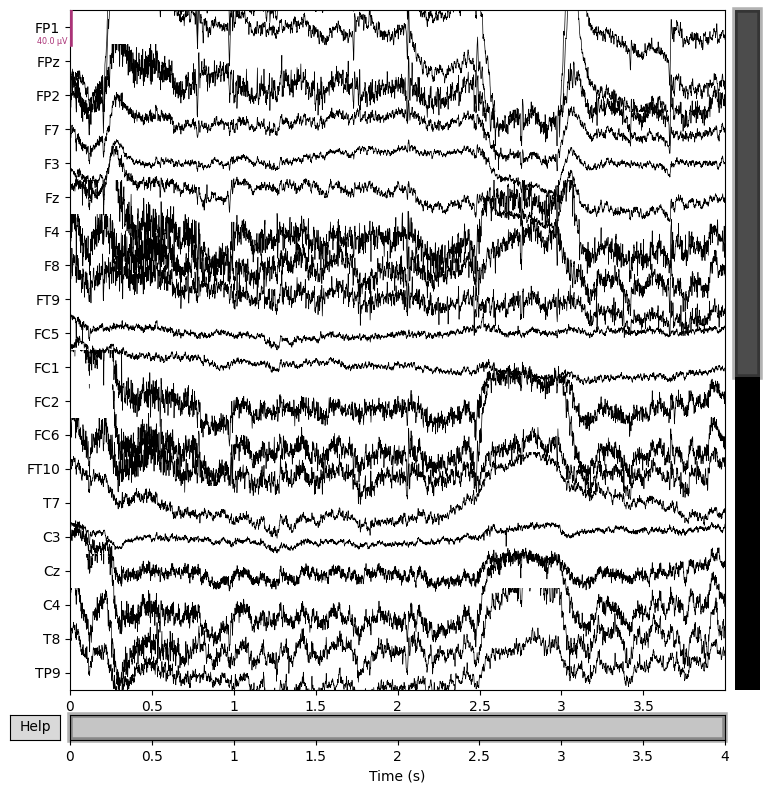

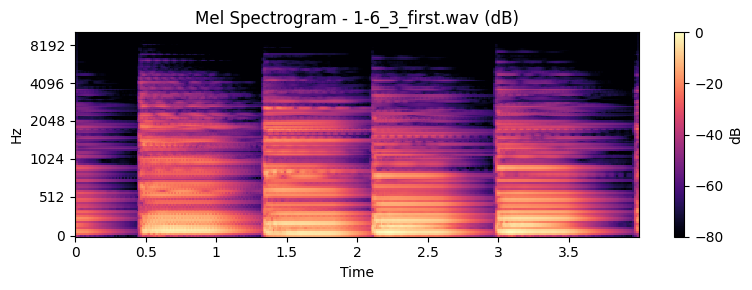

Subject: 08 from dataset: bcmi-training
EEG duration: 4.00s
Music duration: 4.00s
Extracting EDF parameters from /tmp/bcmi_combined_dataset_fzqdcj7_/eeg/bcmi-training/08/3/1/trial_12/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 2815 ... 6814 =      2.815 ...     6.814 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


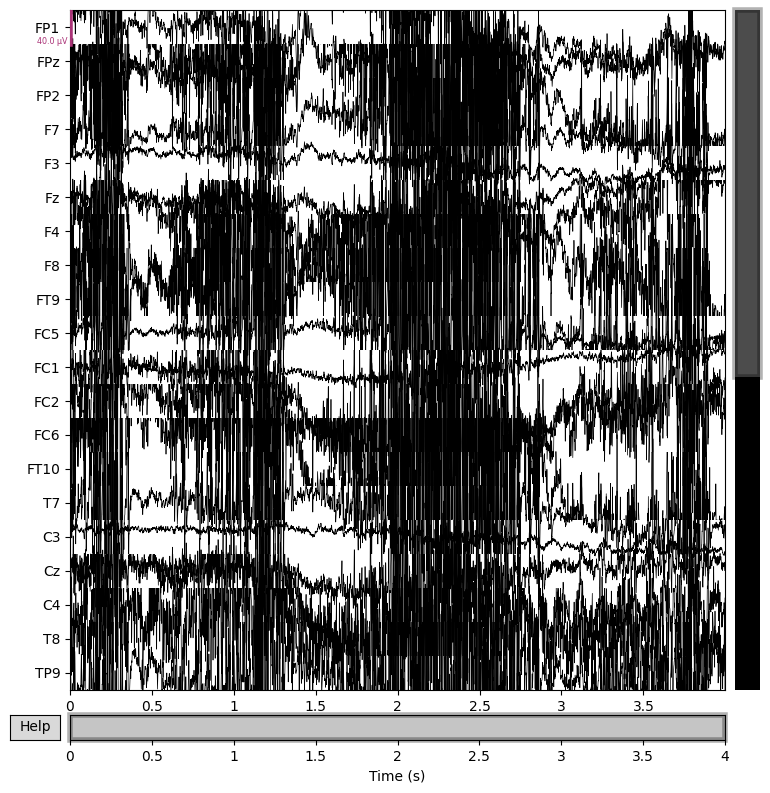

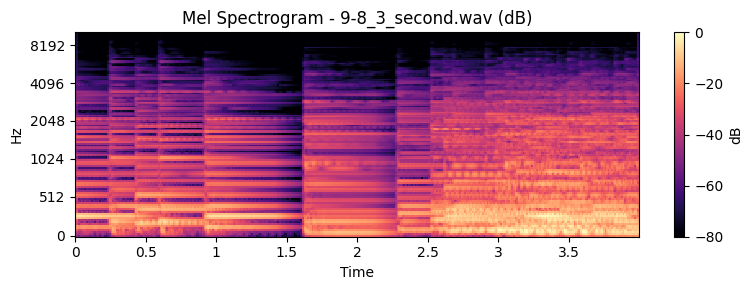

Subject: 08 from dataset: bcmi-training
EEG duration: 4.00s
Music duration: 4.00s
Extracting EDF parameters from /tmp/bcmi_combined_dataset_fzqdcj7_/eeg/bcmi-training/09/3/3/trial_7/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 4155 ... 8154 =      4.155 ...     8.154 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


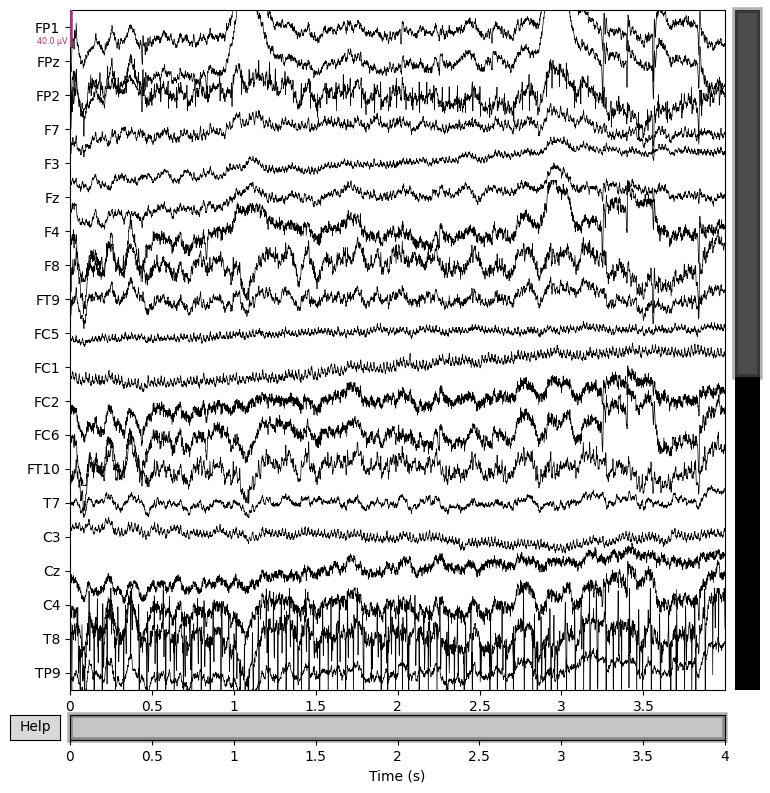

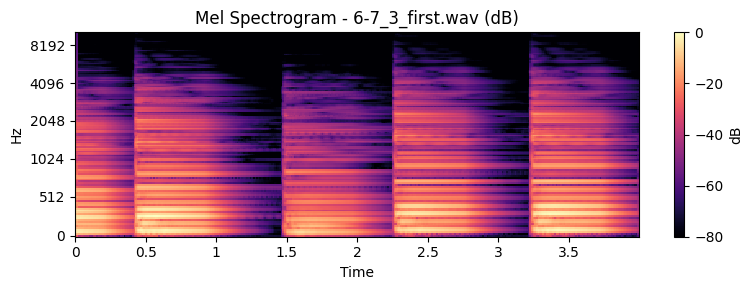

Subject: 09 from dataset: bcmi-training
EEG duration: 4.00s
Music duration: 4.00s
Extracting EDF parameters from /tmp/bcmi_combined_dataset_fzqdcj7_/eeg/bcmi-calibration/03/no_session/5/trial_4/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 276 ... 4275 =      0.276 ...     4.275 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


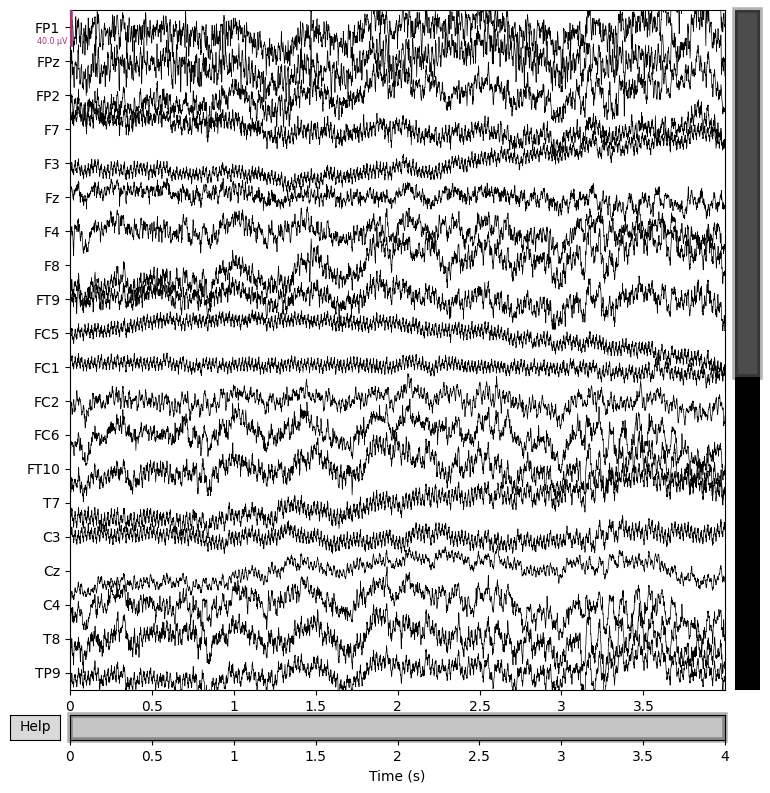

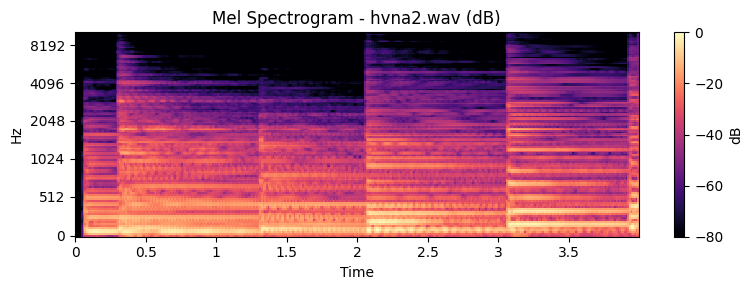

Subject: 03 from dataset: bcmi-calibration
EEG duration: 4.00s
Music duration: 4.00s
Extracting EDF parameters from /tmp/bcmi_combined_dataset_fzqdcj7_/eeg/bcmi-calibration/04/no_session/5/trial_14/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 1184 ... 5183 =      1.184 ...     5.183 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


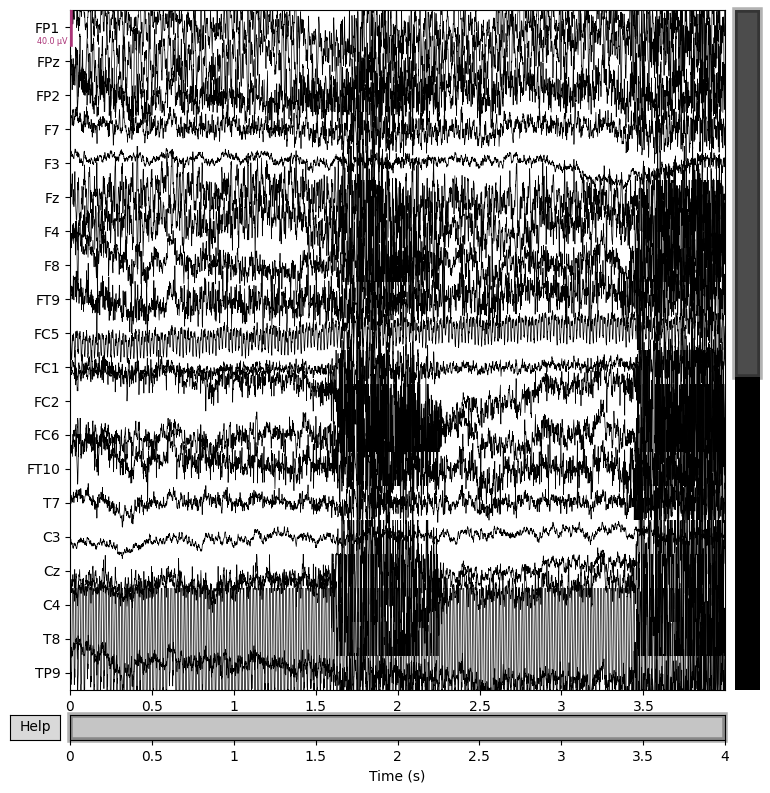

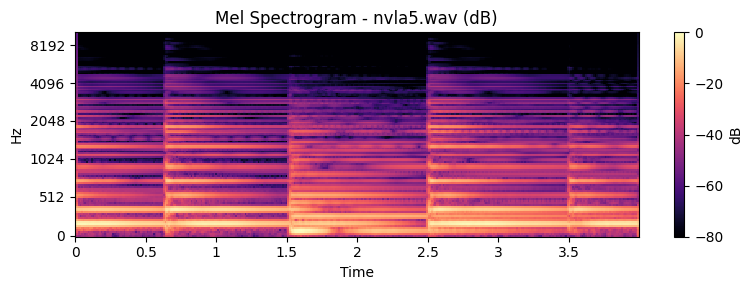

Subject: 04 from dataset: bcmi-calibration
EEG duration: 4.00s
Music duration: 4.00s


In [ ]:
# show_trial_data(dereferenced[0])
# show_trial_data(dereferenced[111])
# show_trial_data(dereferenced[2222])
# show_trial_data(dereferenced[33330])
# show_trial_data(dereferenced[34330])

In [30]:
display(dereferenced[0])
display(dereferenced[111])
display(dereferenced[2222])
display(dereferenced[33330])
display(dereferenced[34330])

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/bcmi_combined_prepared_mel_28ch/stimuli/bcmi-training/1-6_3_first.wav'

Extracting EDF parameters from /tmp/bcmi_combined_dataset_fzqdcj7_/eeg/bcmi-training/08/3/1/trial_1/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 856 ... 4855 =      0.856 ...     4.855 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


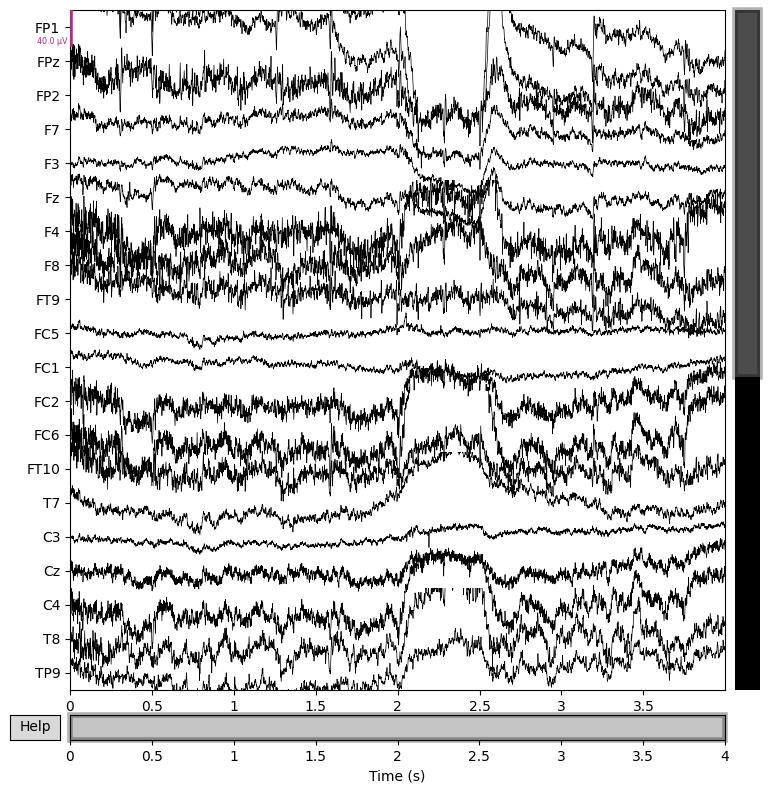

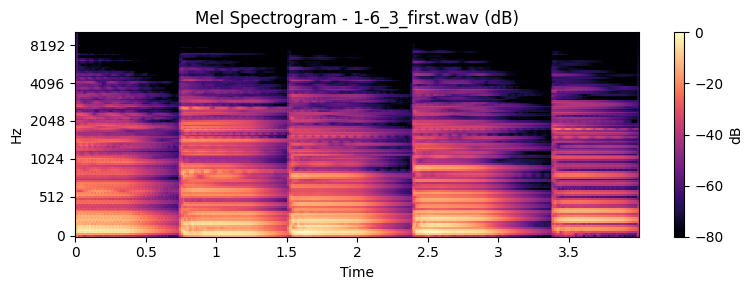

Subject: 08 from dataset: bcmi-training
EEG duration: 4.00s
Music duration: 4.00s
Extracting EDF parameters from /tmp/bcmi_combined_dataset_fzqdcj7_/eeg/bcmi-training/08/3/1/trial_12/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 3184 ... 7183 =      3.184 ...     7.183 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


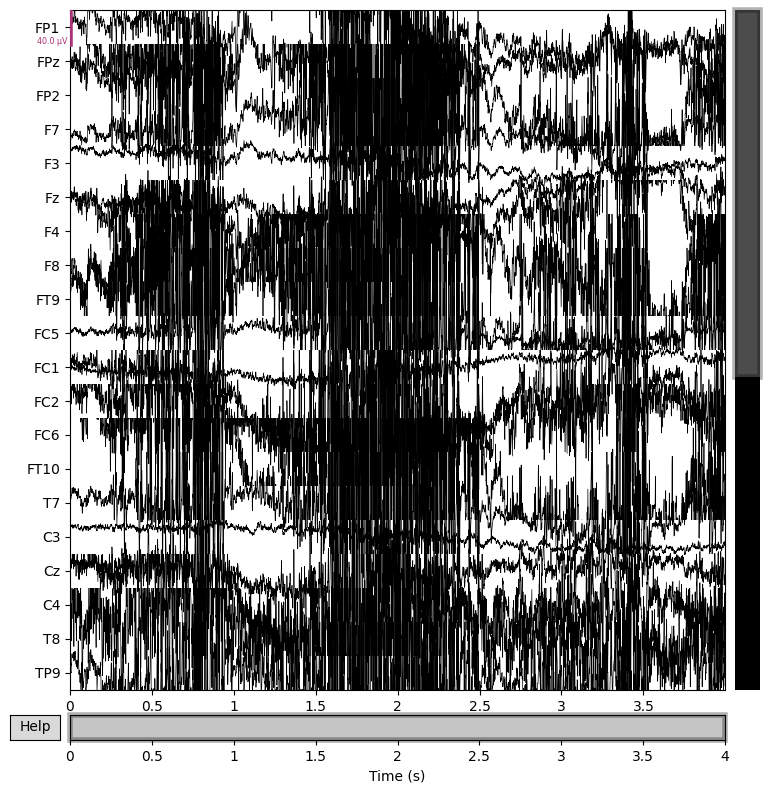

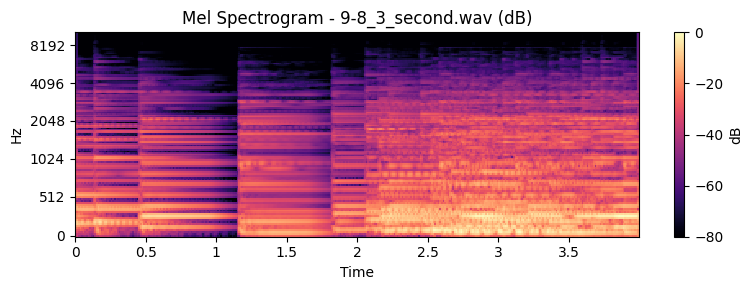

Subject: 08 from dataset: bcmi-training
EEG duration: 4.00s
Music duration: 4.00s
Extracting EDF parameters from /tmp/bcmi_combined_dataset_fzqdcj7_/eeg/bcmi-training/09/3/3/trial_7/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 3674 ... 7673 =      3.674 ...     7.673 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


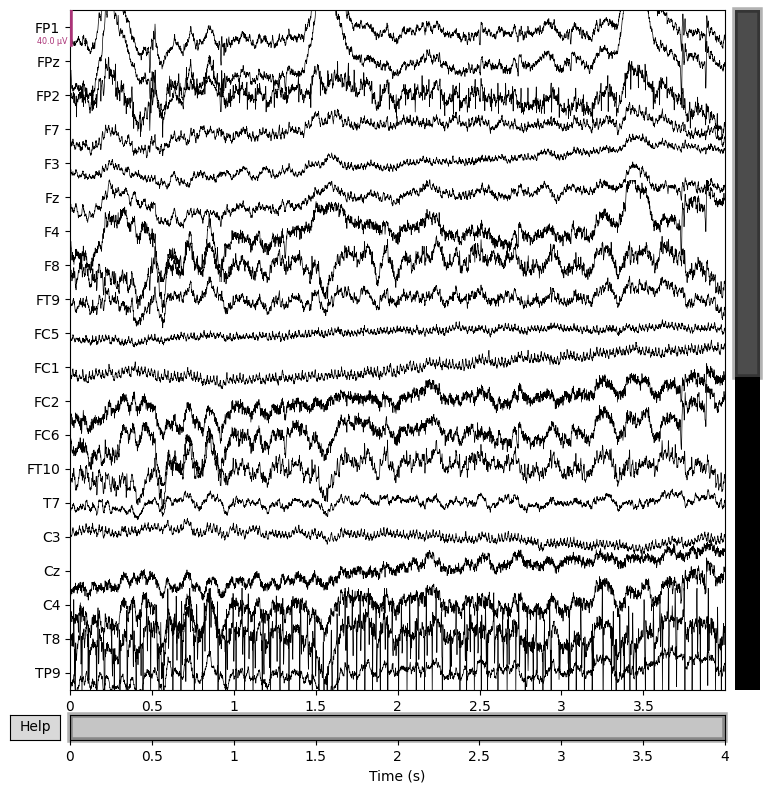

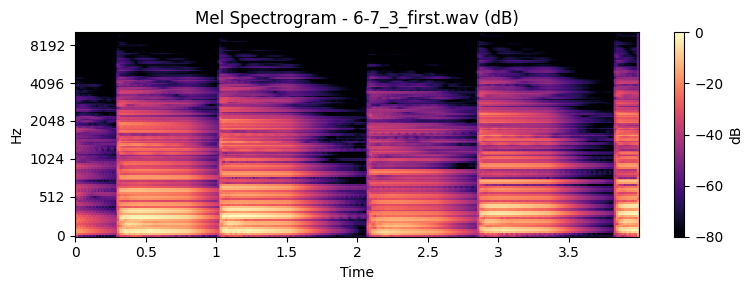

Subject: 09 from dataset: bcmi-training
EEG duration: 4.00s
Music duration: 4.00s
Extracting EDF parameters from /tmp/bcmi_combined_dataset_fzqdcj7_/eeg/bcmi-calibration/03/no_session/5/trial_4/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 1082 ... 5081 =      1.082 ...     5.081 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


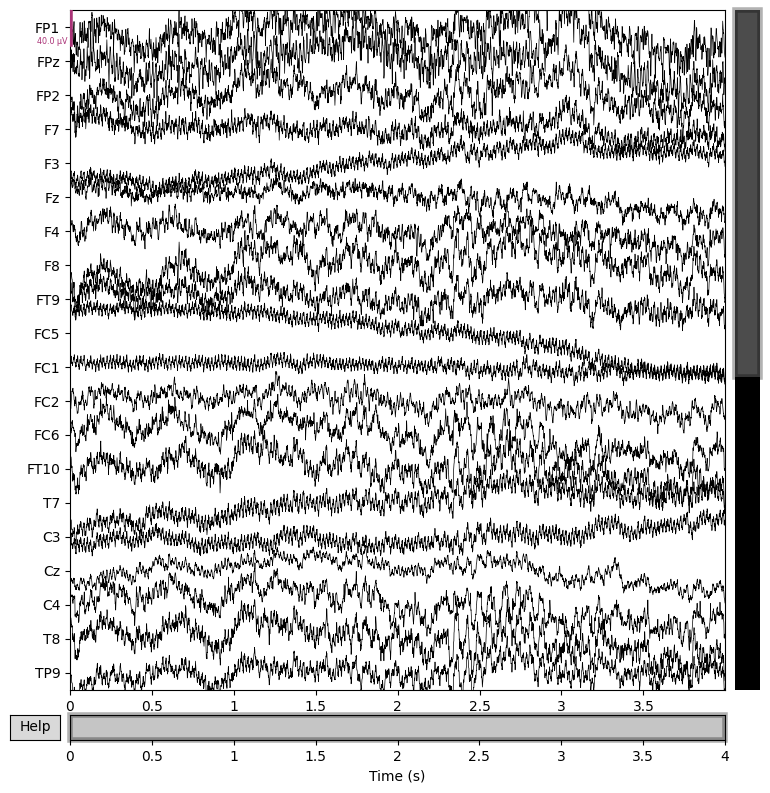

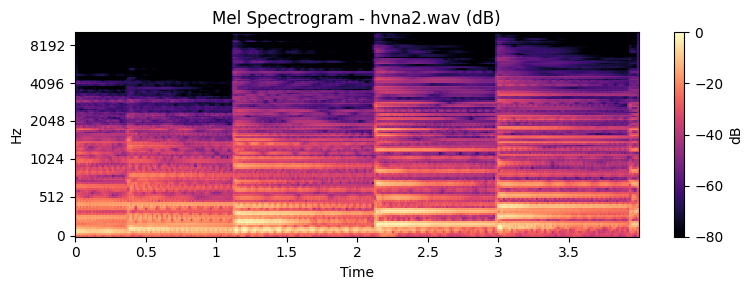

Subject: 03 from dataset: bcmi-calibration
EEG duration: 4.00s
Music duration: 4.00s
Extracting EDF parameters from /tmp/bcmi_combined_dataset_fzqdcj7_/eeg/bcmi-calibration/04/no_session/5/trial_14/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 510 ... 4509 =      0.510 ...     4.509 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


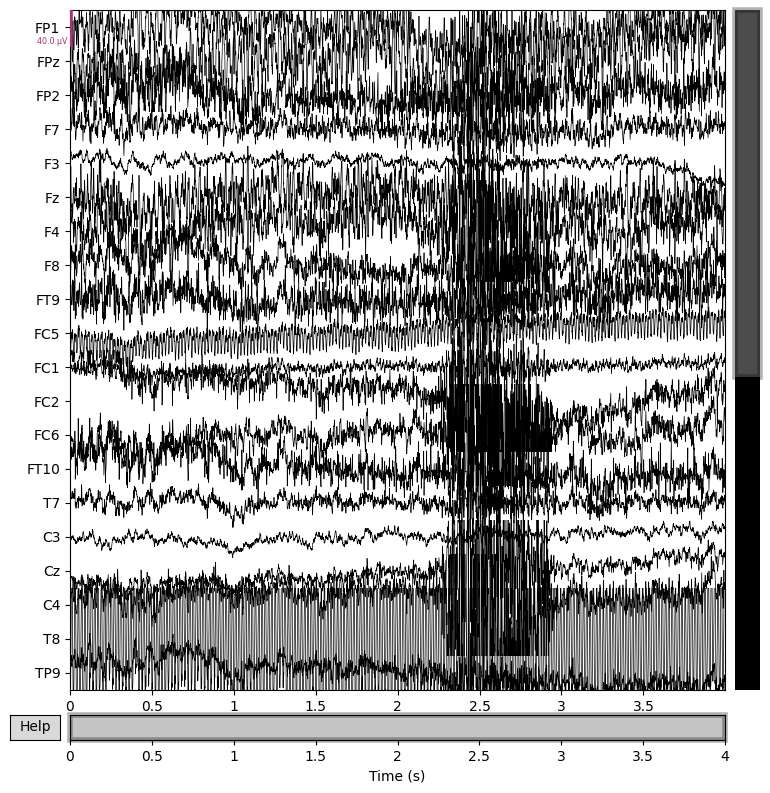

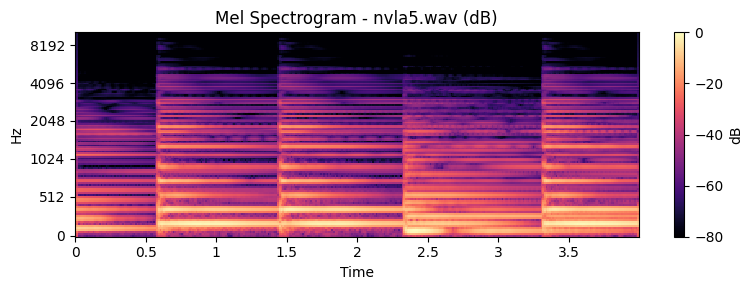

Subject: 04 from dataset: bcmi-calibration
EEG duration: 4.00s
Music duration: 4.00s


In [42]:
show_trial_data(dereferenced[0])
show_trial_data(dereferenced[111])
show_trial_data(dereferenced[2222])
show_trial_data(dereferenced[33330])
show_trial_data(dereferenced[34330])

Extracting EDF parameters from /tmp/bcmi_combined_dataset_fzqdcj7_/eeg/bcmi-training/14/1/1/trial_1/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 189 ... 4188 =      0.189 ...     4.188 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


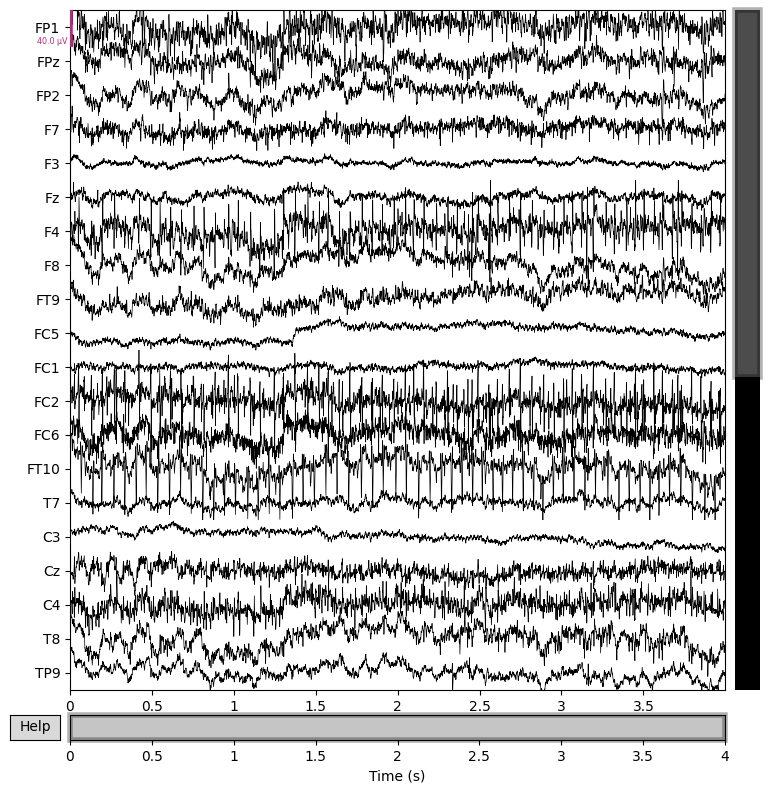

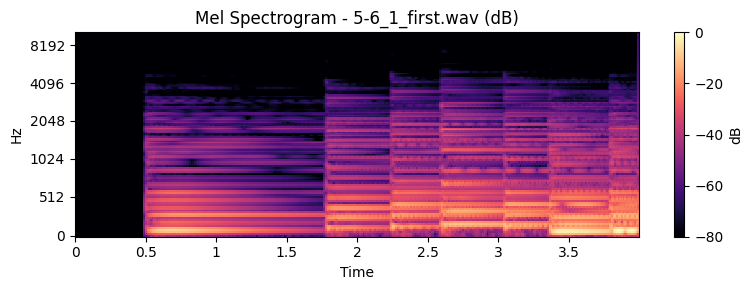

Subject: 14 from dataset: bcmi-training
EEG duration: 4.00s
Music duration: 4.00s
Extracting EDF parameters from /tmp/bcmi_combined_dataset_fzqdcj7_/eeg/bcmi-training/14/1/1/trial_12/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 2557 ... 6556 =      2.557 ...     6.556 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


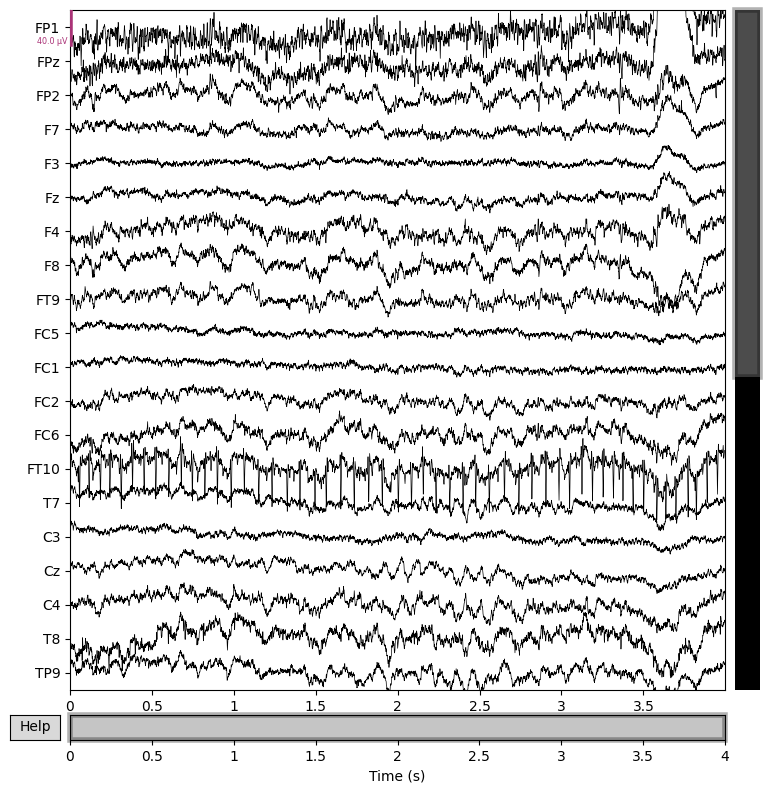

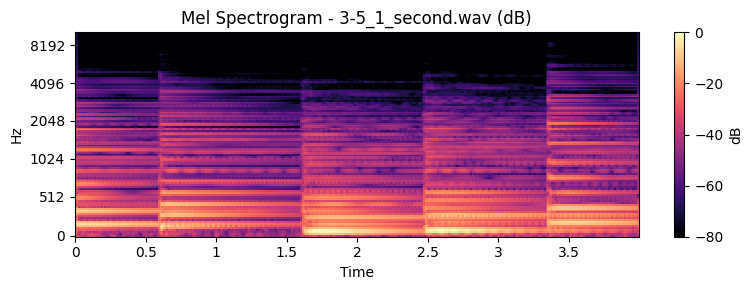

Subject: 14 from dataset: bcmi-training
EEG duration: 4.00s
Music duration: 4.00s
Extracting EDF parameters from /tmp/bcmi_combined_dataset_fzqdcj7_/eeg/bcmi-training/14/2/3/trial_7/eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Creating RawArray with float64 data, n_channels=37, n_times=4000
    Range : 3886 ... 7885 =      3.886 ...     7.885 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


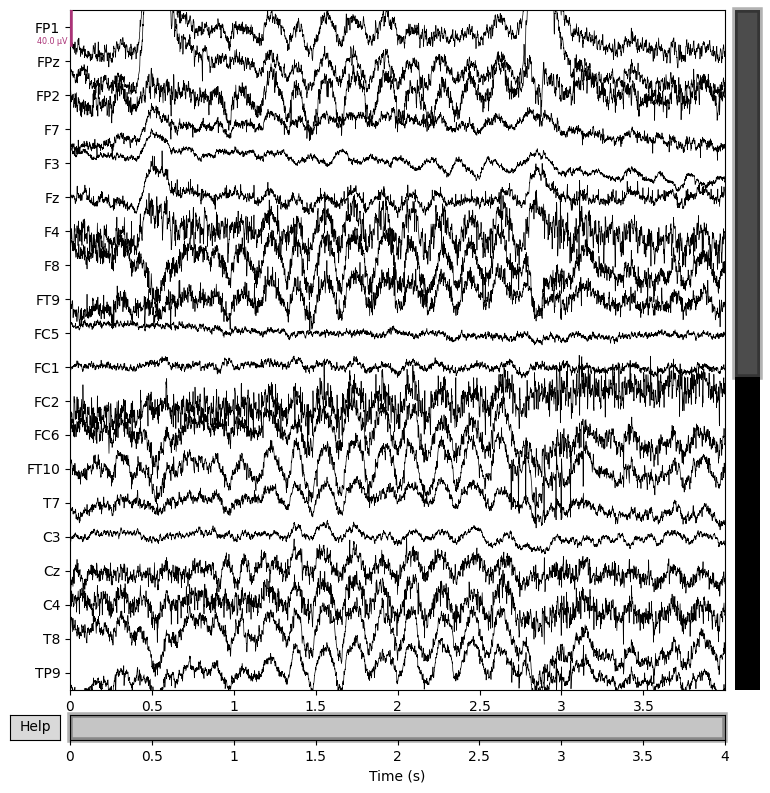

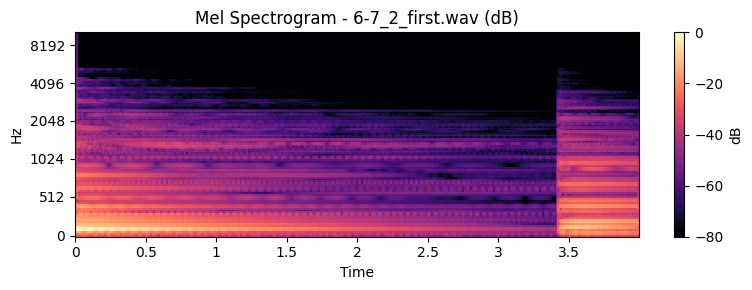

Subject: 14 from dataset: bcmi-training
EEG duration: 4.00s
Music duration: 4.00s


In [ ]:
# show_trial_data(dereferenced_tst[0])
# show_trial_data(dereferenced_tst[111])
# show_trial_data(dereferenced_tst[2222])